In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from warnings import simplefilter


In [5]:
plt.style.use('Solarize_Light2')
simplefilter('ignore')

In [6]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [7]:
data=sm.datasets.sunspots.load_pandas().data

In [8]:
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [10]:
data.index=pd.Index(sm.tsa.datetools.dates_from_range("1700","2008"))
data.index.freq=data.index.inferred_freq
del data["YEAR"]

In [11]:
data

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


<Axes: >

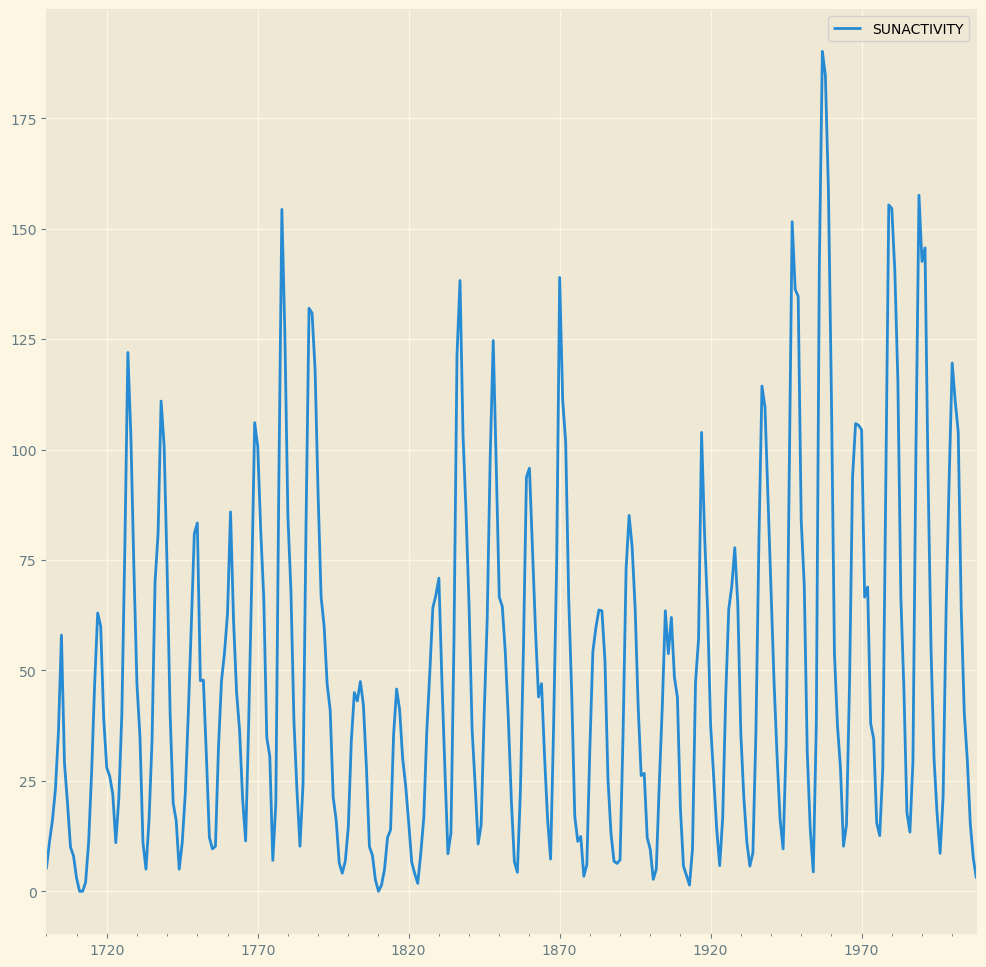

In [12]:
data.plot(figsize=(12,12))

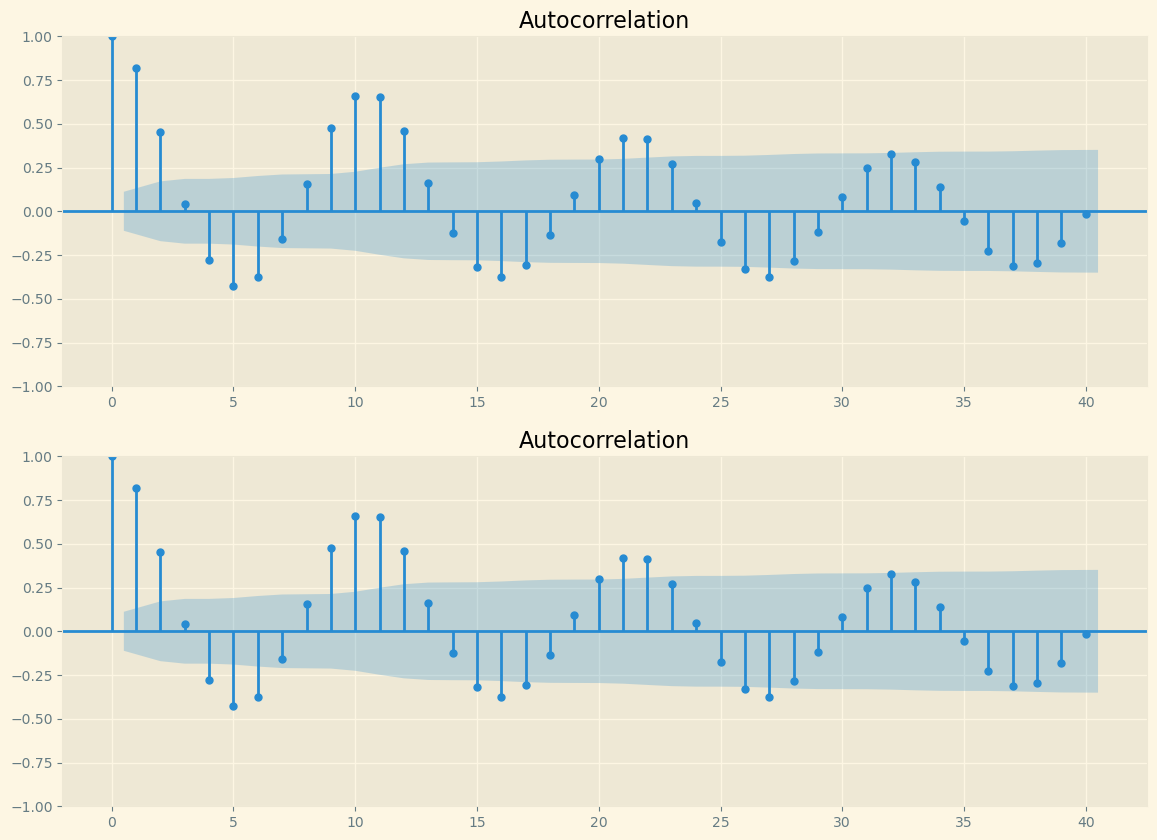

In [14]:
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(data.values.squeeze(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(data,lags=40,ax=ax2)

In [15]:
arma_mod20=ARIMA(data,order=(2,0,0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64


In [16]:
arma_mod30=ARIMA(data,order=(3,0,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)

2622.6370933011694 2637.5704584087603 2628.6074811464155


In [17]:
print(arma_mod30.params)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [18]:
print(arma_mod30.aic,arma_mod20.bic,arma_mod30.hqic)

2619.4036292456476 2637.5704584087603 2626.866614052205


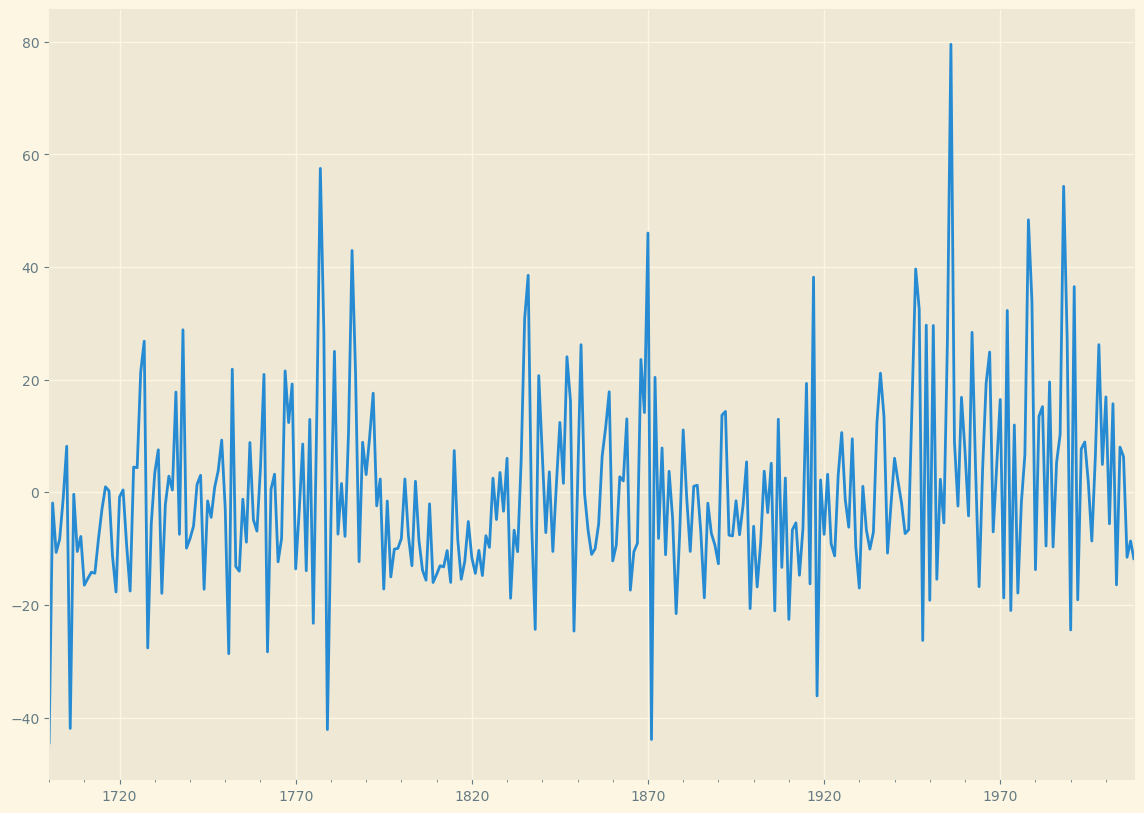

In [19]:
fig=plt.figure(figsize=(14,10))
ax=fig.add_subplot(111)
ax=arma_mod30.resid.plot(ax=ax)

In [20]:
resid=arma_mod30.resid

In [21]:
stats.normaltest(resid)

NormaltestResult(statistic=49.843932216707096, pvalue=1.5015079671899095e-11)

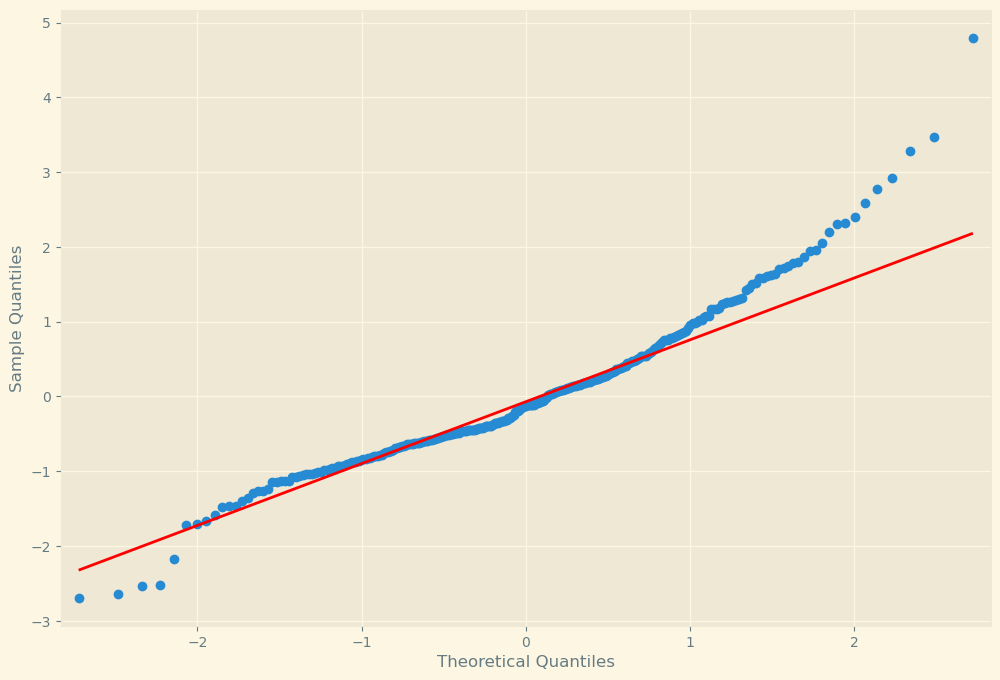

In [22]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
fig=qqplot(resid,line="q",ax=ax,fit=True)

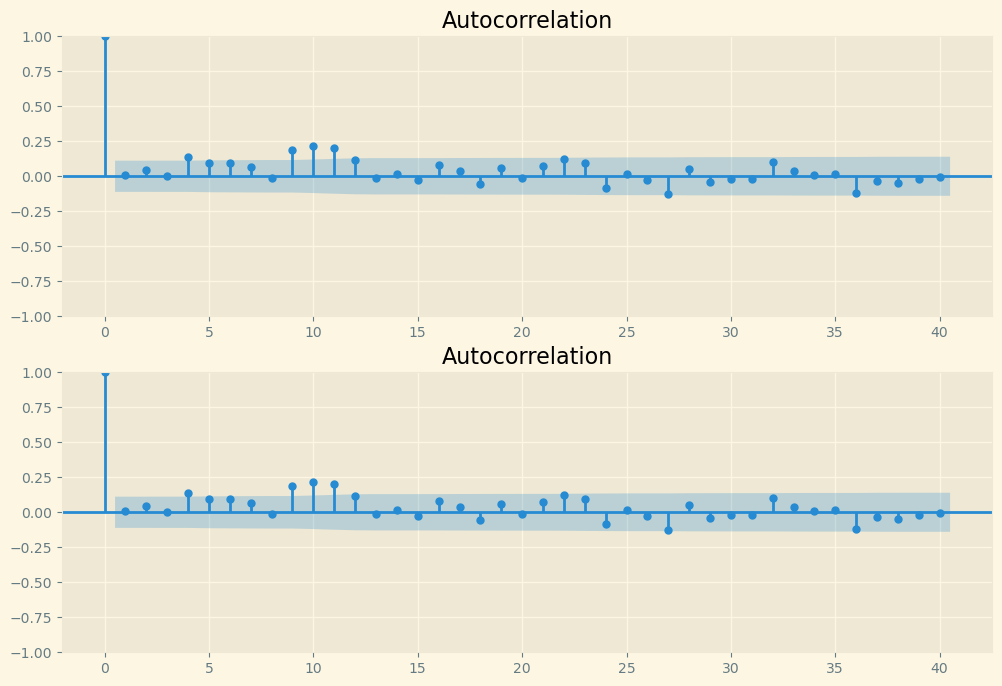

In [23]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_acf(resid,lags=40,ax=ax2)


In [35]:
r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
print("Shapes of ACF results:")
print(f"r: {r.shape}, q: {q.shape}, p: {p.shape}")
min_length = min(len(r) - 1, len(q), len(p)) 
dta = np.c_[np.arange(1, min_length + 1), r[1:min_length + 1], q[:min_length], p[:min_length]]
print("Combined Data Array:")
print(dta)

Shapes of ACF results:
r: (25,), q: (24,), p: (24,)
Combined Data Array:
[[ 1.00000000e+00  9.17040120e-03  2.62388517e-02  8.71318367e-01]
 [ 2.00000000e+00  4.17927926e-02  5.72981909e-01  7.50893871e-01]
 [ 3.00000000e+00 -1.33812957e-03  5.73544242e-01  9.02461192e-01]
 [ 4.00000000e+00  1.36086343e-01  6.40864170e+00  1.70638486e-01]
 [ 5.00000000e+00  9.24649304e-02  9.11135127e+00  1.04704311e-01]
 [ 6.00000000e+00  9.19465420e-02  1.17926614e+01  6.67573722e-02]
 [ 7.00000000e+00  6.87467526e-02  1.32965522e+01  6.52042476e-02]
 [ 8.00000000e+00 -1.50223618e-02  1.33686013e+01  9.97808576e-02]
 [ 9.00000000e+00  1.87590463e-01  2.46410722e+01  3.39496303e-03]
 [ 1.00000000e+01  2.13714771e-01  3.93207580e+01  2.23058803e-05]
 [ 1.10000000e+01  2.01079422e-01  5.23595652e+01  2.34648972e-07]
 [ 1.20000000e+01  1.17179789e-01  5.68024785e+01  8.58035106e-08]
 [ 1.30000000e+01 -1.40569324e-02  5.68666302e+01  1.89520947e-07]
 [ 1.40000000e+01  1.53976782e-02  5.69438640e+01  4.000

In [36]:
table=pd.DataFrame(dta,columns=["lag","AC","Q","Prob(>Q)"])
print(table.set_index("lag"))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746546e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040010  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152954  8.984238e-07
23.0  0.093162  72.069214  5.803579e-07


In [37]:
predict_sunspots=arma_mod30.predict("1990","2012",dynamic=True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424877
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [38]:
def mean_forecast_err(y,yhat):
    return y.sub(yhat).mean()

In [39]:
mean_forecast_err(data.SUNACTIVITY,predict_sunspots)

5.634832996309524